# Recognizing Spoken Digits: Luis Pereda Amaya

In [439]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

In [329]:
train_file = open("Train_Arabic_Digit.txt")
test_file = open("Test_Arabic_Digit.txt")
train_lines = train_file.readlines()
test_lines = test_file.readlines()


In [672]:
# Parsing Training Data

count = -1
blocks = []
# Added spaces to the end of my code for this to work
for line in train_lines:
    if(len(line) == 13):
        if(count >= 0):
            blocks.append(block)
        count += 1
        block = []
    else:
        block.append(line.strip())
blocks.append(block[0 : len(block) - 1])

digits = []

for i in range(1, 11):
    digits.append(blocks[((i-1) * 660) : (i * 660)])

    
for i in range(10):
    for j in range(len(digits[i])):
        for k in range(len(digits[i][j])):
            digits[i][j][k] = digits[i][j][k].split(" ")
            digits[i][j][k] = [float(num) for num in digits[i][j][k]]
            
    
menDigits = []
womenDigits = []
for i in range(10):
    menDigits.append(digits[i][0:330])
    womenDigits.append(digits[i][330:660])
    
Digits = []
for i in range(10):
    frames = []
    for j in range(len(digits[i])):
        frames = frames + digits[i][j]
    Digits.append(frames)
digits = Digits

MenDigits = []
for i in range(10):
    men_frames = []
    for j in range(len(menDigits[i])):
        men_frames = men_frames + menDigits[i][j]
    MenDigits.append(men_frames)
    
WomenDigits = []
for i in range(10):
    women_frames = []
    for j in range(len(womenDigits[i])):
        women_frames = women_frames + womenDigits[i][j]
    WomenDigits.append(women_frames)

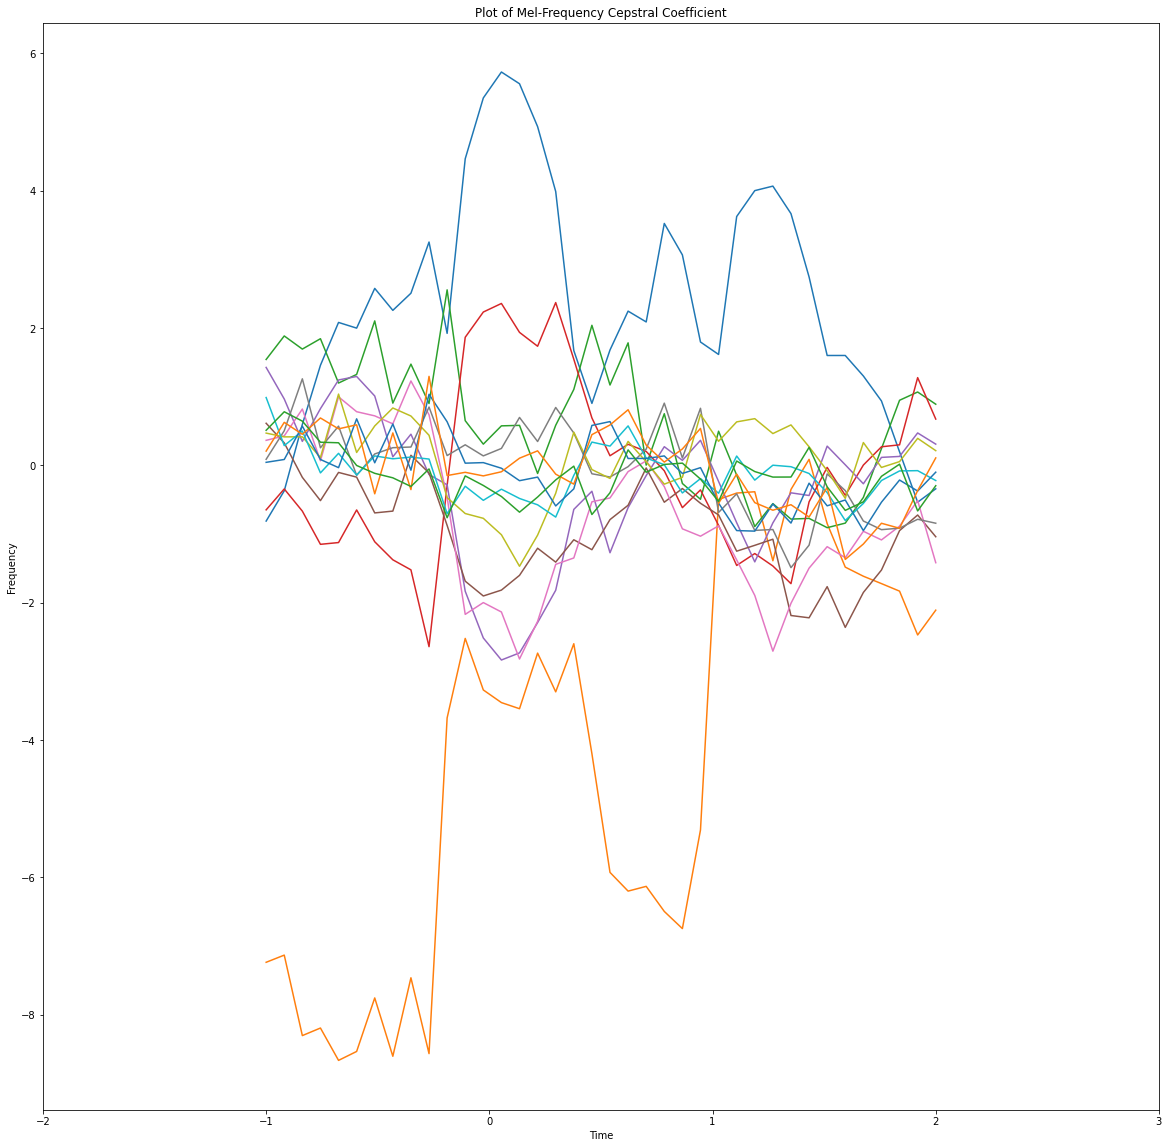

In [677]:
len(blocks[0])
time = np.linspace(-1, 2, 38)

plt.figure(figsize=[20,20])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.xlim([])
plt.title("Plot of Mel-Frequency Cepstral Coefficient")
plt.plot(time, blocks[0])

In [333]:
# Parsing Test Data
count = -1
blocks = []
# Added spaces to the end of my code for this to work
for line in test_lines:
    if(len(line) == 13):
        if(count >= 0):
            blocks.append(block)
        count += 1
        block = []
    else:
        block.append(line.strip())
blocks.append(block[0:len(block) - 1])


test_digits = []
for i in range(1,11):
    test_digits.append(blocks[((i-1) * 220) : (i * 220)])
    
for i in range(10):
    for j in range(len(test_digits[i])):
        for k in range(len(test_digits[i][j])):
            test_digits[i][j][k] = test_digits[i][j][k].split(" ")
            test_digits[i][j][k] = [float(num) for num in test_digits[i][j][k]]
menTestDigits = []
womenTestDigits = []
for i in range(10):
    menTestDigits.append(test_digits[i][0:110])
    womenTestDigits.append(test_digits[i][110:220])
        
test_Digits = []
for i in range(10):
    frames = []
    for j in range(len(test_digits[i])):
        frames = frames + test_digits[i][j]
    test_Digits.append(frames)
# Will use test_blocks to iterate through blocks in test
test_blocks = test_digits

test_digits = test_Digits

In [413]:
digits_subset = []

for i in range(len(Digits)):
    dig = []
    for line in Digits[i]:
        dig.append(line[0:12])
    digits_subset.append(dig)
    
test_blocks_subset = []

for i in range(len(test_blocks)):
    luis = []
    for block in test_blocks[i]:
        blo = []
        for line in block:
            blo.append(line[0:12])
        luis.append(blo)
    test_blocks_subset.append(luis)

In [416]:
print(len(test_blocks[0][0][0]))
print(len(test_blocks_subset[0][0][0]))

13
12


## K-means

In [338]:
def findKmeans(arr, digit, clusters):
    kmeans = KMeans(n_clusters=clusters).fit(arr[digit])
#     labels = kmeans.predict(arr[digit])
    labels = kmeans.labels_
    return kmeans, labels 

def findAndPlotKmeans(arr, digit, clusters):
    plt.figure(figsize=[20,20])
    
    kmeans = KMeans(n_clusters=clusters).fit(arr[digit])
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.predict(test_Digits[digit])

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(test_Digits[digit])

    plt.scatter(pca_data[:, 0], pca_data[:, 1], c = labels, cmap='jet')
    return kmeans

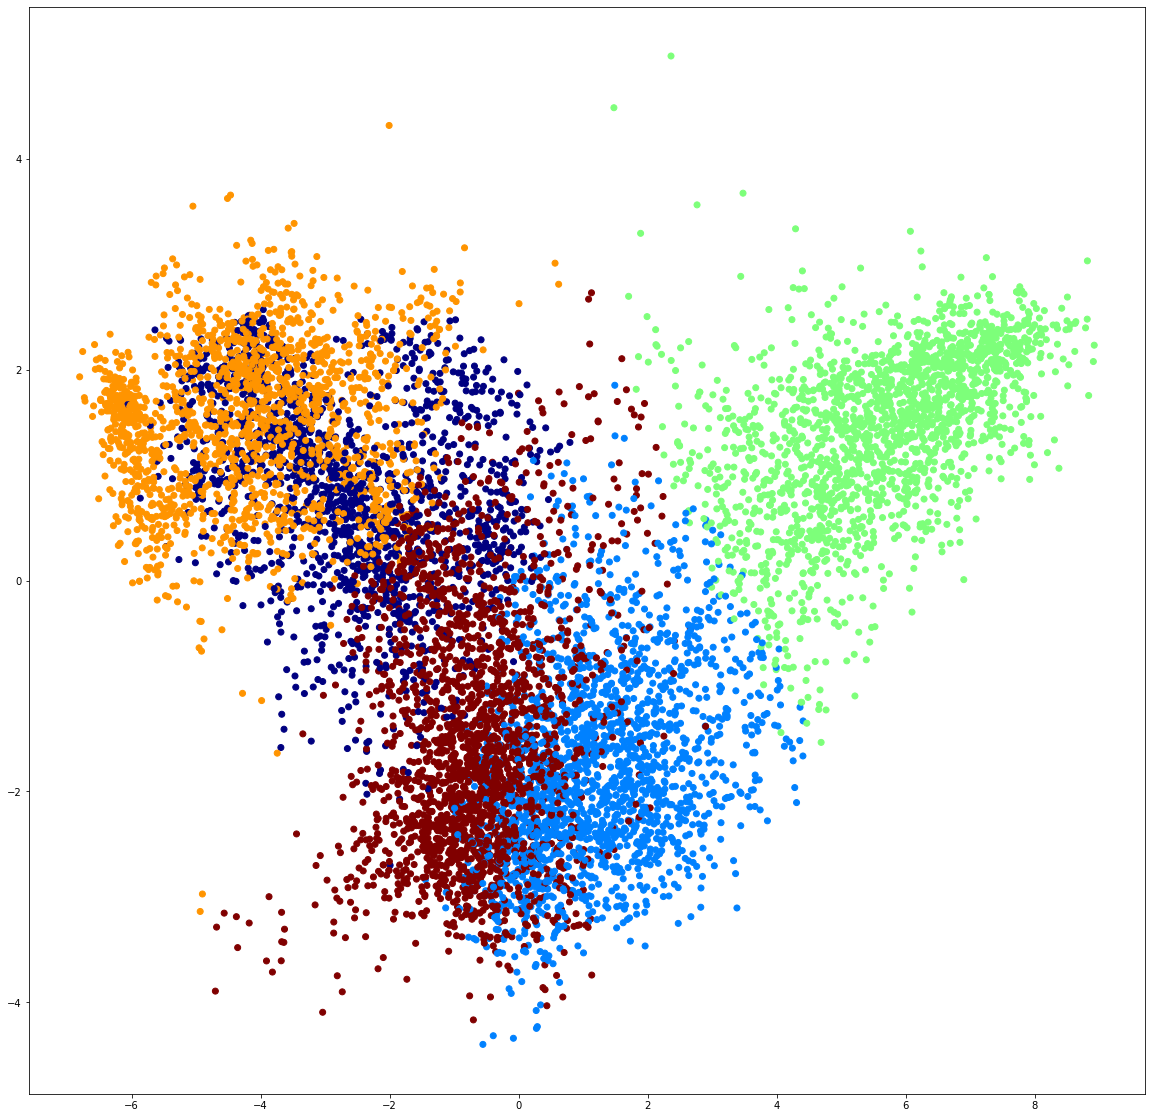

In [539]:
kmeans = findAndPlotKmeans(Digits, 2, 5)

### GMM from KMeans

In [604]:
digit_clusters = [6, 5, 5, 6, 7, 6, 5, 5, 9, 4]
digit_components = [6, 5, 5, 6, 7, 6, 5, 5, 9, 4]
kmeans_arr = []
kmeans_labels = []
for i in range(10):
    kmeans_arr.append(findKmeans(Digits, i, digit_clusters[i])[0])
    kmeans_labels.append(findKmeans(Digits, i, digit_clusters[i])[1])
    

In [605]:
kmeans_arr_men = []
kmeans_arr_women = []
kmeans_labels_men = []
kmeans_labels_women = []

for i in range(10):
    kmeans_arr_men.append(findKmeans(MenDigits, i, digit_clusters[i])[0])
    kmeans_labels_men.append(findKmeans(MenDigits, i, digit_clusters[i])[1])
    
    kmeans_arr_women.append(findKmeans(WomenDigits, i, digit_clusters[i])[0])
    kmeans_labels_women.append(findKmeans(WomenDigits, i, digit_clusters[i])[1])

In [606]:
kmeans_arr_subset = []
kmeans_labels_subset = []

for i in range(10):
    kmeans_arr_subset.append(findKmeans(digits_subset, i, digit_clusters[i])[0])
    kmeans_labels_subset.append(findKmeans(digits_subset, i, digit_clusters[i])[1])

In [607]:
kmeans_centers = []
for digit_model in kmeans_arr:
    kmeans_centers.append(digit_model.cluster_centers_)

In [608]:
kmeans_centers_men = []
for digit_model in kmeans_arr_men:
    kmeans_centers_men.append(digit_model.cluster_centers_)
kmeans_centers_women = []
for digit_model in kmeans_arr_women:
    kmeans_centers_women.append(digit_model.cluster_centers_)

In [609]:
kmeans_centers_subset = []
for digit_model in kmeans_arr_subset:
    kmeans_centers_subset.append(digit_model.cluster_centers_)

In [610]:
df_arr = []
for i in range(10):
    cluster_df = pd.DataFrame()
    cluster_df['cluster'] = kmeans_labels[i]
    cluster_df['data'] = Digits[i]
    df_arr.append(cluster_df)


In [611]:
df_arr_men = []
df_arr_women = []
for i in range(10):
    cluster_df_men = pd.DataFrame()
    cluster_df_men['cluster'] = kmeans_labels_men[i]
    cluster_df_men['data'] = MenDigits[i]
    df_arr_men.append(cluster_df_men)
    
    cluster_df_women = pd.DataFrame()
    cluster_df_women['cluster'] = kmeans_labels_women[i]
    cluster_df_women['data'] = WomenDigits[i]
    df_arr_women.append(cluster_df_women)

In [612]:
df_arr_subset = []
for i in range(10):
    cluster_df_subset = pd.DataFrame()
    cluster_df_subset['cluster'] = kmeans_labels_subset[i]
    cluster_df_subset['data'] = digits_subset[i]
    df_arr_subset.append(cluster_df_subset)

In [613]:
print(len(df_arr[0]))
print(len(df_arr_men[0]))
print(len(df_arr_women[0]))
print(len(df_arr_subset[0]))

23344
11588
11756
23344


In [614]:
def findFullCov(data):
    arr = []
    for i in range(10):
        digit_covariances = []
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            cov = np.cov(samples.T)
            digit_covariances.append(cov)
        arr.append(digit_covariances)
    return arr

In [615]:
full_covariances = findFullCov(df_arr)
full_covariances_men = findFullCov(df_arr_men)
full_covariances_women = findFullCov(df_arr_women)
full_covariances_subset = findFullCov(df_arr_subset)

In [616]:
print(len(full_covariances[0]))
print(len(full_covariances[0][0]))
print(len(full_covariances[0][0][0]))

6
13
13


In [617]:
def findDiagCov(fullCov):
    arr = []
    for i in range(10):
        cluster_diag_covs = []
        for cluster_cov in fullCov[i]:
            diag = np.diag(np.diag(cluster_cov))
            cluster_diag_covs.append(diag)
        arr.append(cluster_diag_covs)
    return arr

In [618]:
diag_covariances = findDiagCov(full_covariances)
diag_covariances_men = findDiagCov(full_covariances_men)
diag_covariances_women = findDiagCov(full_covariances_women)
diag_covariances_subset = findDiagCov(full_covariances_subset)

In [619]:
print(len((diag_covariances)))
print(len(diag_covariances[0]))
print(len((diag_covariances[0][0])))

10
6
13


In [620]:
def findSphericalCov(data):
    arr = []
    for i in range(10):
        demeaned_arr = []
        demeaned_data = np.array([])
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            mean = samples.mean(axis = 0)
            demeaned = samples - mean
            demeaned_arr.append(demeaned)
        demeaned_data = np.concatenate(demeaned_arr)
        digit_var = np.var(demeaned_data)
        var_mat = np.identity(13) * digit_var
        arr.append(var_mat)
    return arr

In [621]:
sphere_covariances = findSphericalCov(df_arr)
sphere_covariances_men = findSphericalCov(df_arr_men)
sphere_covariances_women = findSphericalCov(df_arr_women)
sphere_covariances_subset = findSphericalCov(df_arr_subset)

In [622]:
print(len(sphere_covariances[0][0]))

13


In [623]:
def findTiedCov(data):
    arr = []
    for i in range(10):
        demeaned_arr = []
        demeaned_data = np.array([])
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            mean = samples.mean(axis = 0)
            demeaned = samples - mean
            demeaned_arr.append(demeaned)
        demeaned_data = np.concatenate(demeaned_arr)
        demeaned_cov = np.cov(demeaned_data.T)
        arr.append(demeaned_cov)
    return arr

In [624]:
tied_covariances = findTiedCov(df_arr)
tied_covariances_men = findTiedCov(df_arr_men)
tied_covariances_women = findTiedCov(df_arr_women)
tied_covariances_subset = findTiedCov(df_arr_subset)

In [625]:
print(len(tied_covariances[0]))
print(len(tied_covariances[0][0]))

13
13


In [626]:
def findWeights(data):
    arr = []
    for i in range(10):
        weights = []
        for j in range(digit_clusters[i]):
            np_arr = np.array(data[i][data[i].cluster == j])
            samples = np.array([x[1] for x in np_arr])
            weight = len(samples) / len(data[i])
            weights.append(weight)
        arr.append(weights)
    return arr

In [627]:
digit_weights = findWeights(df_arr)
digit_weights_men = findWeights(df_arr_men)
digit_weights_women = findWeights(df_arr_women)
digit_weights_subset = findWeights(df_arr_subset)

In [628]:
def setFullCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='full')
        gmm.means_ = centers[i]
        gmm.covariances_ = covs[i]
        gmm.weights_ = weights[i]
        gmm.precisions_ = np.linalg.inv(covs[i])
        gmm.precisions_cholesky_ = np.linalg.cholesky(gmm.precisions_)
        arr.append(gmm)
    return arr

In [629]:
KMeans_GMM_full_cov = setFullCovModel(kmeans_centers, full_covariances, digit_weights)
KMeans_GMM_full_cov_men = setFullCovModel(kmeans_centers_men, full_covariances_men, digit_weights_men)
KMeans_GMM_full_cov_women = setFullCovModel(kmeans_centers_women, full_covariances_women, digit_weights_women)
KMeans_GMM_full_cov_subset = setFullCovModel(kmeans_centers_subset, full_covariances_subset, digit_weights_subset)

In [630]:
def setTiedCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='tied')
        gmm.means_ = centers[i]
        gmm.covariances_ = covs[i]
        gmm.weights_ = weights[i]
        gmm.precisions_ = np.linalg.inv(covs[i])
        gmm.precisions_cholesky_ = np.linalg.cholesky(gmm.precisions_)
        arr.append(gmm)
    return arr

In [631]:
KMeans_GMM_tied_cov = setTiedCovModel(kmeans_centers, tied_covariances, digit_weights)
KMeans_GMM_tied_cov_men = setTiedCovModel(kmeans_centers_men, tied_covariances_men, digit_weights_men)
KMeans_GMM_tied_cov_women = setTiedCovModel(kmeans_centers_women, tied_covariances_women, digit_weights_women)
KMeans_GMM_tied_cov_subset = setTiedCovModel(kmeans_centers_subset, tied_covariances_subset, digit_weights_subset)

In [632]:
def setDiagCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='diag')
        gmm.means_ = centers[i]
        gmm.covariances_ = [np.diag(cluster) for cluster in covs[i]]
        gmm.weights_ = weights[i]
        diag_precisions_matrix = np.linalg.inv(covs[i])
        gmm.precisions_ = [np.diag(item) for item in diag_precisions_matrix]
        gmm.precisions_cholesky_ = np.array([np.diag(item) for item in np.linalg.cholesky(diag_precisions_matrix)])
        arr.append(gmm)
    return arr

In [633]:
KMeans_GMM_diag_cov = setDiagCovModel(kmeans_centers, diag_covariances, digit_weights)
KMeans_GMM_diag_cov_men = setDiagCovModel(kmeans_centers_men, diag_covariances_men, digit_weights_men)
KMeans_GMM_diag_cov_women = setDiagCovModel(kmeans_centers_women, diag_covariances_women, digit_weights_women)
KMeans_GMM_diag_cov_subset = setDiagCovModel(kmeans_centers_subset, diag_covariances_subset, digit_weights_subset)

In [634]:
def setSphericalCovModel(centers, covs, weights):
    arr = []
    for i in range(10):
        gmm = GaussianMixture(n_components=digit_components[i], covariance_type='spherical')
        gmm.means_ = centers[i]
        gmm.covariances_ = covs[i][0][0]
        gmm.weights_ = weights[i]
        sphere_precisions_matrix = np.linalg.inv(covs[i])
        gmm.precisions_ = sphere_precisions_matrix[0][0]
        gmm.precisions_cholesky_ = np.linalg.cholesky(sphere_precisions_matrix)[0][0]
        arr.append(gmm)
    return arr

In [635]:
KMeans_GMM_spherical_cov = setSphericalCovModel(kmeans_centers, sphere_covariances, digit_weights)
KMeans_GMM_spherical_cov_men = setSphericalCovModel(kmeans_centers_men, sphere_covariances_men, digit_weights_men)
KMeans_GMM_spherical_cov_women = setSphericalCovModel(kmeans_centers_women, sphere_covariances_women, digit_weights_women)
KMeans_GMM_spherical_cov_subset = setSphericalCovModel(kmeans_centers_subset, sphere_covariances_subset, digit_weights_subset)

### ML Classification

In [636]:
def findAccuracyNonGendered(covs):
    correct = 0
    total = 0
    for i in range(10):
        for block in test_blocks[i]:
            maxScore = covs[0].score(block)
            maxIndex = 0
            total += 1
            for digit in range(10):
                score = covs[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            if(maxIndex == i):
                correct += 1
    print(correct / total)

In [637]:
def findAccuracyGendered(covs_men, covs_women):
    correct = 0
    total = 0
    for i in range(10):
        for block in menTestDigits[i]:
            maxScore = covs_men[0].score(block)
            maxIndex = 0
            total += 1
            for digit in range(10):
                score = covs_men[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            if(maxIndex == i):
                correct += 1
    for i in range(10):
        for block in womenTestDigits[i]:
            maxScore = covs_women[0].score(block)
            maxIndex = 0
            total += 1
            for digit in range(10):
                score = covs_women[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            if(maxIndex == i):
                correct += 1
    print(correct/total)

In [638]:
def findAccuracySubset(covs):
    correct = 0
    total = 0
    for i in range(10):
        for block in test_blocks_subset[i]:
            maxScore = covs[0].score(block)
            maxIndex = 0
            total += 1
            for digit in range(10):
                score = covs[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            if(maxIndex == i):
                correct += 1
    print(correct / total)

In [639]:
def findConfusionMatrix(model, blocksForTest):
    true_values = []
    predicted_values = []

    for i in range(2200): 
        true_values.append(i // 220)

    for i in range(10):
        for block in blocksForTest[i]:
            maxScore = model[0].score(block)
            maxIndex = 0
            for digit in range(10):
                score = model[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            predicted_values.append(maxIndex)
    cmat = confusion_matrix(true_values, predicted_values, normalize='true')
    return cmat

In [722]:
def findConfusionMatrixGendered(covs_men, covs_women):
    true_values_men = []
    true_values_women = []
    predicted_values = []

    for i in range(1100): 
        true_values_men.append(i // 110)
        true_values_women.append(i // 110)

    for i in range(10):
        for block in menTestDigits[i]:
            maxScore = covs_men[0].score(block)
            maxIndex = 0
            for digit in range(10):
                score = covs_men[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            predicted_values.append(maxIndex)
    for i in range(10):
        for block in womenTestDigits[i]:
            maxScore = covs_women[0].score(block)
            maxIndex = 0
            for digit in range(10):
                score = covs_women[digit].score(block)
                if(score > maxScore):
                    maxScore = score
                    maxIndex = digit
            predicted_values.append(maxIndex)
    true_values = true_values_men + true_values_women
    cmat = confusion_matrix(true_values, predicted_values, normalize='true')
    return cmat

<AxesSubplot:>

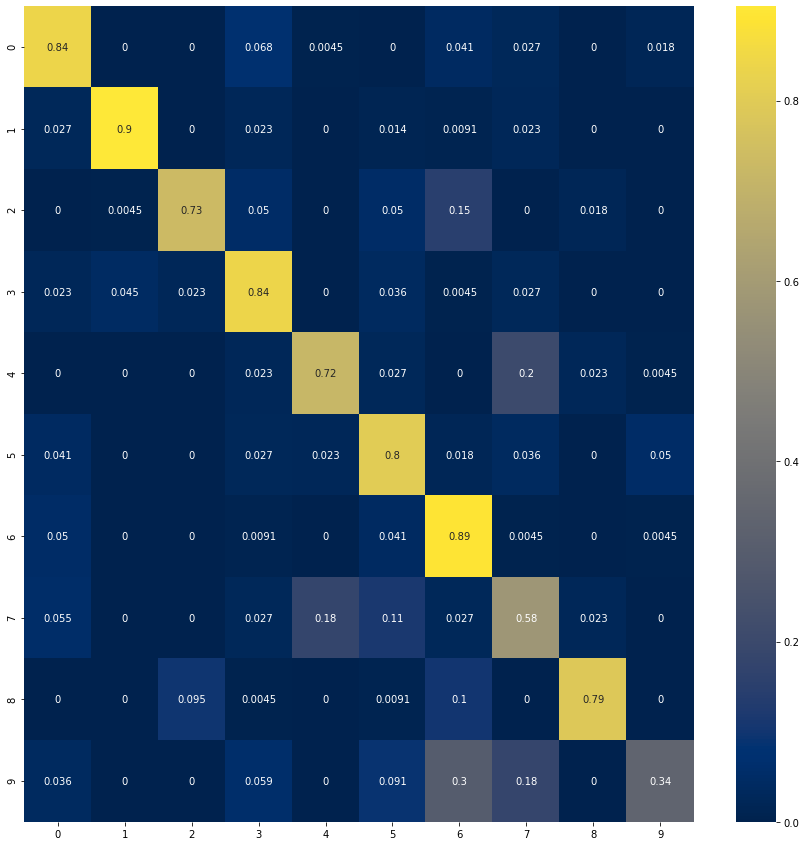

In [736]:
cmap = findConfusionMatrix(KMeans_GMM_spherical_cov_subset, test_blocks_subset)
plt.figure(figsize=[15,15])
sns.heatmap(cmap, annot=True, cmap = 'cividis')

#### Non-Gendered

In [641]:
# Spherical 
findAccuracyNonGendered(KMeans_GMM_spherical_cov)

0.7454545454545455


In [642]:
# Diagonal
findAccuracyNonGendered(KMeans_GMM_diag_cov)

0.7363636363636363


In [643]:
# Tied
findAccuracyNonGendered(KMeans_GMM_tied_cov)

0.8440909090909091


In [644]:
# Full
findAccuracyNonGendered(KMeans_GMM_full_cov)

0.6372727272727273


#### Gendered

In [645]:
# Spherical 
findAccuracyGendered(KMeans_GMM_spherical_cov_men, KMeans_GMM_spherical_cov_women)

0.8045454545454546


In [646]:
# Diagonal 
findAccuracyGendered(KMeans_GMM_diag_cov_men, KMeans_GMM_diag_cov_women)

0.8013636363636364


In [647]:
# Tied
findAccuracyGendered(KMeans_GMM_tied_cov_men, KMeans_GMM_tied_cov_women)

0.8731818181818182


In [648]:
# Full 
findAccuracyGendered(KMeans_GMM_full_cov_men, KMeans_GMM_full_cov_women)

0.6940909090909091


#### Subset

In [733]:
# Spherical 
findAccuracySubset(KMeans_GMM_spherical_cov_subset)

0.7436363636363637


In [650]:
# Diagonal 
findAccuracySubset(KMeans_GMM_diag_cov_subset)

0.7204545454545455


In [651]:
# Tied
findAccuracySubset(KMeans_GMM_tied_cov_subset)

0.8472727272727273


In [652]:
# Full
findAccuracySubset(KMeans_GMM_full_cov_subset)

0.5159090909090909


## Expectation-Maximization

In [653]:
# Seaborn stuff
    # pca_df = pd.DataFrame(data = pca_data, columns = ['1', '2'])
    # pca_df['color'] = pd.DataFrame(labels)
    # ax = sns.scatterplot(x = '1', y = '2', data = pca_df, hue = 'color', legend = 'full', palette = 'husl')

In [654]:
def findAndPlotEM(digit, components, covar_type):   
#     plt.figure(figsize=[20,20])

    em_model = GaussianMixture(n_components=components, covariance_type= covar_type).fit(Digits[digit])
    return em_model

#     pca = PCA(n_components=2)
#     pca_data = pca.fit_transform(test_Digits[digit])
#     plt.scatter(pca_data[:, 0], pca_data[:, 1], c = labels, cmap='jet')

In [655]:
def findAndPlotEMGendered(digit, components, covar_type, genderBoolean):
    # Let true be male and false female (F for female)
    if (genderBoolean):
        em_model = GaussianMixture(n_components=components, covariance_type= covar_type).fit(MenDigits[digit])
    else:
        em_model = GaussianMixture(n_components=components, covariance_type= covar_type).fit(WomenDigits[digit])
    
    return em_model
        

In [656]:
em_models_full = []
em_male_models_full = []
em_female_models_full = []

em_models_tied = []
em_male_models_tied = []
em_female_models_tied = []

em_models_diag = []
em_male_models_diag = []
em_female_models_diag = []

em_models_sphere = []
em_male_models_sphere = []
em_female_models_sphere = []

# Components defined empirically by looking for well defined clusters near 2n - 1 where n is phonemes
digit_components = [6, 7, 7, 6, 7, 6, 5, 5, 9, 4]
for i in range(10):
    em_models_full.append(findAndPlotEM(i, digit_components[i], 'full'))
    em_male_models_full.append(findAndPlotEMGendered(i, digit_components[i], 'full', True))
    em_female_models_full.append(findAndPlotEMGendered(i, digit_components[i], 'full', False))
    
    em_models_tied.append(findAndPlotEM(i, digit_components[i], 'tied'))
    em_male_models_tied.append(findAndPlotEMGendered(i, digit_components[i], 'tied', True))
    em_female_models_tied.append(findAndPlotEMGendered(i, digit_components[i], 'tied', False))
    
    em_models_diag.append(findAndPlotEM(i, digit_components[i], 'diag'))
    em_male_models_diag.append(findAndPlotEMGendered(i, digit_components[i], 'diag', True))
    em_female_models_diag.append(findAndPlotEMGendered(i, digit_components[i], 'diag', False))
    
    em_models_sphere.append(findAndPlotEM(i, digit_components[i], 'spherical'))
    em_male_models_sphere.append(findAndPlotEMGendered(i, digit_components[i], 'spherical', True))
    em_female_models_sphere.append(findAndPlotEMGendered(i, digit_components[i], 'spherical', False))
    

In [657]:
print(em_models_full[1].weights_)

[0.13623235 0.14152037 0.13250311 0.1778419  0.14170137 0.12950699
 0.14069391]


### ML Classification

#### Can use same functions defined for KMeans

#### Non-gendered

In [658]:
# Non-gendered Full
findAccuracyNonGendered(em_models_full)

0.8795454545454545


In [659]:
# Non-gendered Tied
findAccuracyNonGendered(em_models_tied)

0.8859090909090909


In [660]:
# Non-gendered Diag
findAccuracyNonGendered(em_models_diag)

0.8718181818181818


In [661]:
# Non-gendered Spherical
findAccuracyNonGendered(em_models_sphere)

0.7613636363636364


#### Gendered

In [662]:
# Gendered full
findAccuracyGendered(em_male_models_full, em_female_models_full)


0.8618181818181818


In [663]:
# Gendered tied
findAccuracyGendered(em_male_models_tied, em_female_models_tied)

0.8877272727272727


In [664]:
# Gendered diag
findAccuracyGendered(em_male_models_diag, em_female_models_diag)

0.9027272727272727


In [665]:
# Gendered spherical

findAccuracyGendered(em_male_models_sphere, em_female_models_sphere)

0.8327272727272728


<AxesSubplot:>

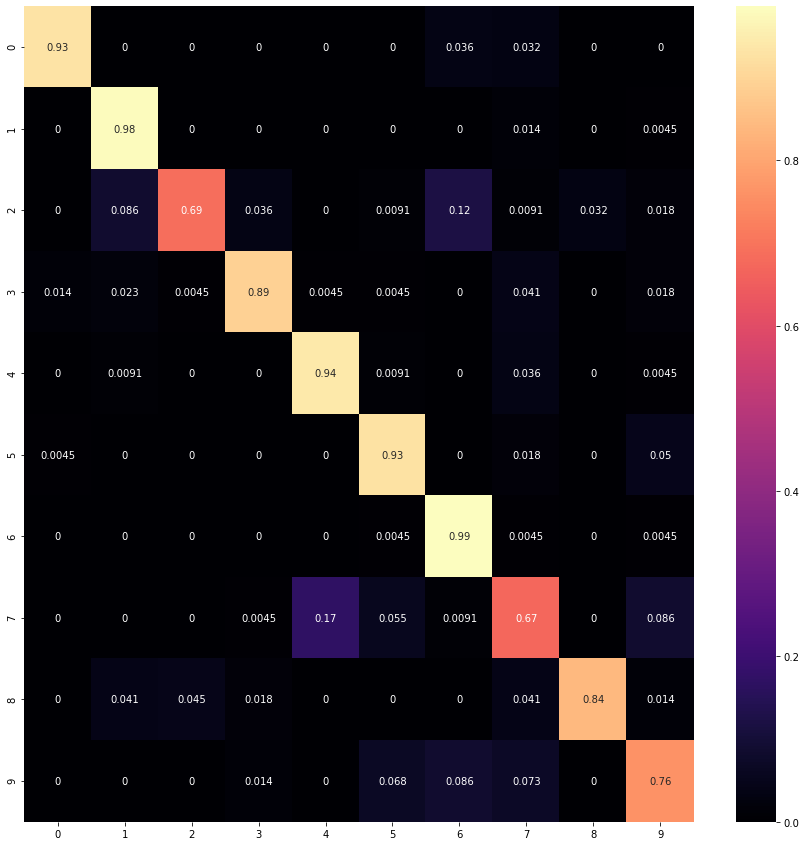

In [730]:
plt.figure(figsize = [15,15])
sns.heatmap(findConfusionMatrixGendered(em_male_models_full, em_female_models_full), annot=True, cmap = 'magma')